<a href="https://colab.research.google.com/github/AnanyaGodse/Image-Processing-and-Computer-Vision-I/blob/main/IPCV_Experiment_6_High_Pass_%26_High_Boost_Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Ananya Godse SAP ID: 60009220161 Batch: D1-1**

### **LAB 6 - High Pass Filters & High Boost Filters**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
img = cv2.imread('low contrast woman.ppm')

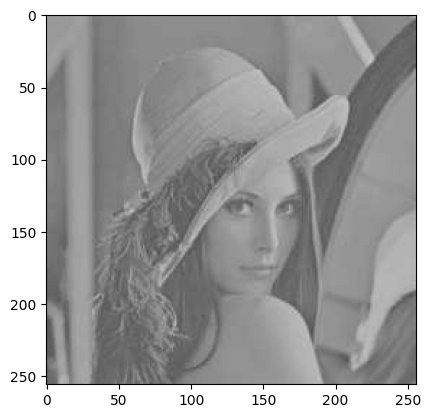

In [ ]:
plt.imshow(img)
plt.show()

**Defining the kernel:**

In [ ]:
kernel = np.array([[-1, -1, -1],
                       [-1,  8, -1],
                       [-1, -1, -1]])

**Applying High Pass Filter:**

A high-pass filter is designed to emphasize high-frequency components in an image, such as edges and fine details, by attenuating or removing low-frequency components (smooth regions or gradual transitions).

It is used for edge detection, sharpening images, and enhancing details by highlighting rapid intensity changes.

In [ ]:
def apply_high_pass_filter(img, kernel):
    filtered_img = np.zeros_like(img, dtype=np.float64)
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            filtered_img[i, j] = np.sum(img[i-1:i+2, j-1:j+2] * kernel)
    filtered_img = np.clip(filtered_img, 0, 255)
    filtered_img = filtered_img.astype(np.uint8)
    return filtered_img

In [ ]:
high_pass_filtered_img = apply_high_pass_filter(img, kernel)

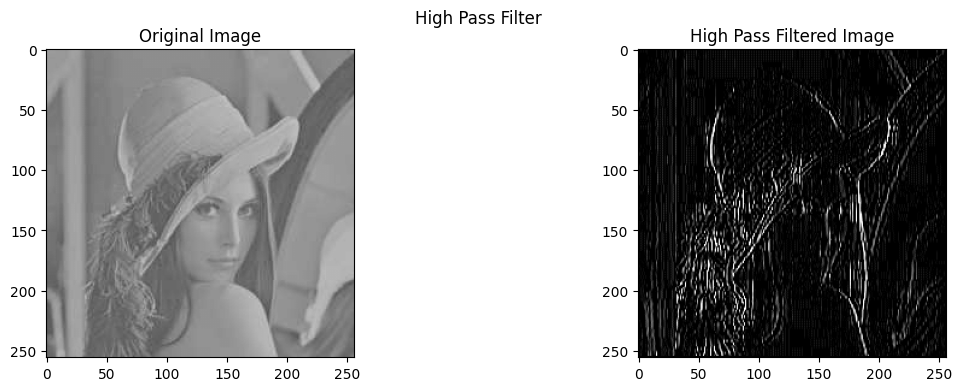

In [ ]:
plt.figure(figsize=(14, 4))
plt.suptitle("High Pass Filter")

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(high_pass_filtered_img)
plt.title("High Pass Filtered Image")

plt.show()

**Applications of High Pass Filters:**

1. **Edge Detection:** High-pass filters are widely used for detecting edges and fine details in images, such as in facial recognition or object detection.

2. **Image Sharpening:** They enhance sharpness by amplifying high-frequency components, useful in improving the clarity of images in photography and microscopy.

3. **Feature Extraction:** High-pass filters are used in feature extraction tasks, helping to identify and highlight specific details for computer vision applications.

**Applying High Boost Filter:**

A high-boost filter is an extension of the high-pass filter that not only emphasizes high-frequency details but also retains some low-frequency components by adding a scaled version of the original image back to the high-pass filtered image.

It is used for image sharpening where both fine details and overall structure need to be enhanced, making it useful in areas like medical imaging and facial recognition.

In [ ]:
def apply_high_boost_filter(img, kernel, factor):
    filtered_img = apply_high_pass_filter(img, kernel)
    scale = np.max(np.abs(filtered_img))
    if scale > 0:
        filtered_img = (filtered_img / scale) * 255
    high_boost_img = img + factor * filtered_img
    high_boost_img = np.clip(high_boost_img, 0, 255).astype(np.uint8)
    return high_boost_img

In [ ]:
high_boost_filtered_img = apply_high_boost_filter(img, kernel, factor=2)

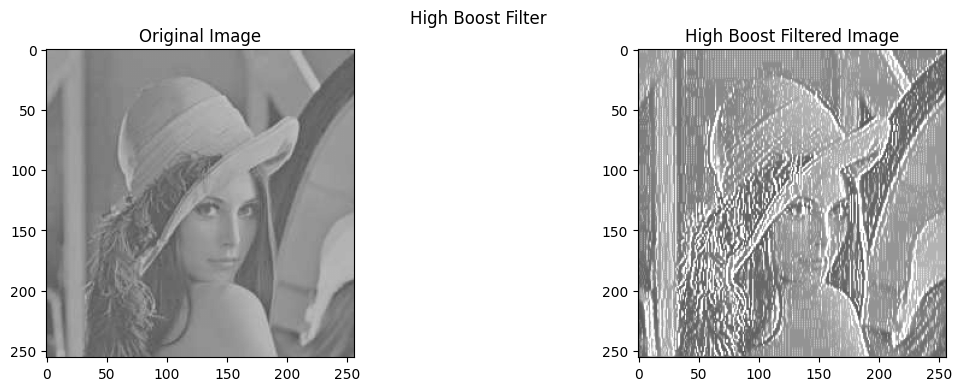

In [ ]:
plt.figure(figsize=(14, 4))
plt.suptitle("High Boost Filter")

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(high_boost_filtered_img)
plt.title("High Boost Filtered Image")

plt.show()

**Applications of High Boost Filters:**

1. **Enhanced Image Sharpening:** High-boost filters sharpen an image by enhancing both fine details and overall contrast, making them useful in areas like medical imaging or satellite image analysis.

2. **Detail Enhancement:** It's applied when a balance is needed between preserving low-frequency information and enhancing high-frequency details, such as in portrait photography or document image processing.

3. **Improving Visual Quality:** In fields like remote sensing and video processing, high-boost filters help improve the visual quality by refining both textures and larger structures in the image.

**Conclusion:**

High Pass & High Boost Filters and their applications were studied. Both of them were applied on an image. The high boost filter retained low-frequency components of the image, keeping the overall context of the image intact, while the high pass filters just showed the edges (high-frequency components).